<a href="https://colab.research.google.com/github/adalves-ufabc/2025.Q3-PLN/blob/main/2025_Q3_PLN_AULA_04_Notebook_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2025-Q3]**
Prof. Alexandre Donizeti Alves

### **Tokens e Vocabulário**
---



Em Processamento de Linguagem Natural (PLN), um ***token*** refere-se a uma unidade básica de processamento de texto. Geralmente, um ***token*** é definido como uma sequência contígua de caracteres que forma uma unidade significativa em um texto. Essa unidade pode ser uma **palavra**, um **número**, um **símbolo de pontuação** ou até mesmo um **caractere individual**, dependendo do objetivo do processamento.



Por exemplo, na seguinte frase:

 > `O gato preto saltou sobre o muro`




Os ***tokens*** são:

> `O`, `gato`, `preto`, `saltou`, `sobre`, `o`, `muro`

O **vocabulário**, por sua vez, refere-se ao conjunto de todos os *tokens* únicos que ocorrem em um determinado córpus. Em outras palavras, o **vocabulário** é o conjunto de todas as palavras distintas em um determinado conjunto de textos.

O **vocabulário** é frequentemente usado em PLN para construir modelos estatísticos de linguagem, como modelos de linguagem de *n-gramas*, que podem ser usados ​​para tarefas como predição de palavras e geração de texto.

Por exemplo, se tivermos um conjunto de documentos que contenha as seguintes frases:

    O gato preto saltou sobre o muro.
    O cão correu no parque.
    O gato e o cão são animais de estimação populares.

Quantidade de ***tokens*** e ***types*** (tipos):

> ***Tokens***: conta todas as ocorrências

> ***Types***: conta apenas uma ocorrência = **tamanho do vocabulário**

O **vocabulário** desses documentos seria composto pelas seguintes ***types*** (tipos):

`O`, `gato`, `preto`, `saltou`, `sobre`, `o`, `muro`, `cão`, `correu`, `no`, `parque`, `e`, `são`, `animais`, `de`, `estimação`, `populares`.

Note que alguns ***tokens*** aparecem em mais de uma frase, como **`O`** e **`gato`**, mas o **vocabulário** inclui apenas uma única ocorrência de cada ***token***, ou seja, apenas os ***types***.

### **Tokenizadores**
---

**Tokenizador por Espaço**

Desenvolvido com base no principal delimitador para uma grande parcela das línguas naturais humanas: `o espaço`

In [ ]:
texto = "No meio do caminho tinha uma pedra."

texto.split()

['No', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra.']

**Tokenizador baseado numa expressão regular**

Segmenta as palavras de um texto com base em delimitadores como espaço, pontuações e início/fim de uma sequência (`\b`)

In [ ]:
import re

texto = "No meio do caminho tinha uma pedra."

re.sub(r"(\b)", r" \1", texto).split()

['No', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', '.']

**Tokenizador baseado em Regras**

1. Buscar todas as ocorrências de valores numéricos e financeiros (R$1,00; $46; etc.)

2. Buscar todas as ocorrências de sequências de 1 ou mais caracteres

3. Buscar todas as ocorrências de sequências sem espaço


In [ ]:
texto = "Eu paguei R$456,00 pelo setup. O que acha?"
regex = r"R?\$?[\d\.\,]+|\w+|\S+"
re.findall(regex, texto)

['Eu', 'paguei', 'R$456,00', 'pelo', 'setup', '.', 'O', 'que', 'acha', '?']

Aqui está um exemplo de código em `Python` que usa a biblioteca `NLTK` para tokenizar uma frase:

In [ ]:
import nltk

# faz o download do tokenizador punkt da biblioteca nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

O código **`nltk.download('punkt')`** é usado para fazer o download do **tokenizador** **`punkt`** da biblioteca **`NLTK`** (*`Natural Language Toolkit`*).

O **tokenizador** **`punkt`** é um algoritmo de tokenização pré-treinado para separar um texto em unidades menores, geralmente palavras ou sentenças, considerando regras específicas para diferentes idiomas.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# definir a frase a ser tokenizada
frase = "Eu gosto de pizza de mussarela."

# usar a funcao word_tokenize() para tokenizar a frase
tokens = word_tokenize(frase)

# imprimir os tokens
print(tokens)

['Eu', 'gosto', 'de', 'pizza', 'de', 'mussarela', '.']


In [ ]:
type(tokens)

list

Note que a função **`word_tokenize`** separou a frase em uma lista de *tokens*, considerando pontuações e espaços em branco.

Aqui está um exemplo de código em **`Python`** que usa o conceito de vocabulário para contar a frequência de cada token em um córpus:

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# definir o corpus
texto = "O gato preto saltou sobre o muro. O cão correu no parque. O gato e o cão são animais de estimação populares."

# tokenizar o corpus
tokens = word_tokenize(texto)

# criar vocabulario a partir dos tokens [set: evitar duplicatas]
vocabulario = set(tokens)

In [ ]:
# criar dicionario para contar frequencia de cada token
word_frequency = {}
for word in tokens:
    if word not in word_frequency:
        word_frequency[word] = 1
    else:
        word_frequency[word] += 1

In [ ]:
# imprimir vocabulario
print(vocabulario)

{'no', 'de', 'populares', 'muro', 'são', 'saltou', 'e', 'o', 'gato', 'parque', 'estimação', 'animais', '.', 'preto', 'sobre', 'O', 'correu', 'cão'}


In [ ]:
print(len(vocabulario))

18


In [ ]:
# imprimir frequencia
print(word_frequency)

{'O': 3, 'gato': 2, 'preto': 1, 'saltou': 1, 'sobre': 1, 'o': 2, 'muro': 1, '.': 3, 'cão': 2, 'correu': 1, 'no': 1, 'parque': 1, 'e': 1, 'são': 1, 'animais': 1, 'de': 1, 'estimação': 1, 'populares': 1}


Aqui está um exemplo que usa a biblioteca **`NLTK`** para tokenizar um texto em palavras e calcular a frequência de cada palavra no texto.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# definir o texto a ser processado
texto = "O Brasil é o país do futebol. O futebol é um esporte popular em todo o mundo."

# tokenizar o texto em palavras
palavras = word_tokenize(texto)

# calcular a frequencia de cada palavra no texto
frequencia = Counter(palavras)

# imprimir as 5 palavras mais frequentes no texto
print(frequencia.most_common(5))

[('O', 2), ('é', 2), ('o', 2), ('futebol', 2), ('.', 2)]


Aqui está outro exemplo usando a biblioteca **`NLTK`**, que é similar ao exemplo anterior, mas usa a função **`nltk.FreqDist()`** para calcular as frequências de cada palavra.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# definir o texto a ser processado
texto = "O Brasil é o país do futebol. O futebol é um esporte popular em todo o mundo."

# tokenizar o texto em palavras
palavras = word_tokenize(texto, language='portuguese')

# calcular a frequencia de cada palavra no texto
frequencia = FreqDist(palavras)

# imprimir as 5 palavras mais frequentes no texto
print(frequencia.most_common(5))

[('O', 2), ('é', 2), ('o', 2), ('futebol', 2), ('.', 2)]


### **NLTK**

A biblioteca **`NLTK`** (*Natural Language Toolkit*)  é uma biblioteca de PLN em **`Python`**. Ela é amplamente usada em pesquisas acadêmicas e industriais, e também é uma das bibliotecas mais populares em PLN.

A biblioteca **`NLTK`** contém um grande conjunto de ferramentas e recursos para processar e analisar textos em linguagem natural. Alguns dos recursos mais importantes da biblioteca são:

   * **Tokenização**: a biblioteca fornece várias opções para tokenizar textos em palavras e sentenças. A tokenização é a primeira etapa do pré-processamento de dados em PLN.

   * ***POS (Part-of-Speech)*** ***Tagging***: a biblioteca possui algoritmos para marcar as palavras em um texto com sua classe gramatical, como substantivos, verbos, adjetivos etc.

   * **Análise sintática**: a biblioteca pode ser usada para analisar a estrutura sintática de uma frase, como a identificação do sujeito, objeto, verbo principal etc.

   * **Dicionários e corpora**: a biblioteca fornece acesso a vários dicionários e corpora em linguagem natural, que podem ser usados para treinar modelos de PLN ou como referência em pesquisas.

Uma das primeiras coisas a se testar é se o **`NLTK`** está disponível no **Google Colab**. Para isso, execute a seguinte instrução:

In [ ]:
import nltk

`NLTK` possui uma série de pacotes adicionais ou [corpora](#myfootnote1)  que podem ser facilmente adicionados na instalação básica da biblioteca.

Para ter acesso ao download destes pacotes adicionais, basta utilizar o comando:

`nltk.download()`

<a name="myfootnote1">Corpora</a>: plural de **córpus**, que em latim significa conjunto de uma obra. Termo que serve para designar um conjunto de textos, ou registros orais de uma língua para fins de análise.

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

Um dos **corpora** disponibilizado pela biblioteca `NLTK` é a obra completa de **Machado de Assis**. O nome desse pacote é "`machado`".

In [ ]:
from nltk.corpus import machado

Aparentemente está disponível, mas caso não estivesse, bastaria realizar o download.

In [ ]:
nltk.download("machado")

[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

Agora é possível, por exemplo, obter algumas informações sobre o córpus:

In [ ]:
from nltk.corpus import machado
from nltk.corpus.util import LazyCorpusLoader

# carregando o corpus usando LazyCorpusLoader com codificação ISO-8859-1
machado_corpus = LazyCorpusLoader(
    'machado',
    CategorizedPlaintextCorpusReader,
    r'(?!\.).*\.txt',
    cat_pattern=r'([a-z]+)/.*',
    encoding='latin1'
)

print ("Número de arquivos no corpora:", len(machado_corpus.fileids()))
print ("Primeiros três textos do corpora", machado_corpus.fileids()[0:3])
print ("Quantas palavras existem nesse corpora?", len(machado_corpus.words()))

Número de arquivos no corpora: 246
Primeiros três textos do corpora ['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt']
Quantas palavras existem nesse corpora? 3121944


**Outras bibliotecas**


---



**spaCy**

Aqui está um exemplo de como realizar a tokenização e criação do vocabulário usando a biblioteca `spaCy`:

In [ ]:
# as vezes eh necessario reiniciar o ambiente
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 775.5 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Aqui está um exemplo de como realizar a tokenização e criação do vocabulário usando a biblioteca `spaCy`:

In [ ]:
import spacy

# carregando modelo do spaCy para a lingua portuguesa
nlp = spacy.load("pt_core_news_lg")

# definindo texto para ser processado
texto = "O Brasil é o país do futebol. O futebol é um esporte popular em todo o mundo."

# criando um objeto Doc para o texto
doc = nlp(texto)

# imprimindo tokens e seus indices
for token in doc:
    print(token.text, token.idx)

O 0
Brasil 2
é 9
o 11
país 13
do 18
futebol 21
. 28
O 30
futebol 32
é 40
um 42
esporte 45
popular 53
em 61
todo 64
o 69
mundo 71
. 76


In [ ]:
# criando o vocabulario a partir do objeto Doc
vocabulario = set(token.text for token in doc)

# imprimindo o vocabulario
print(vocabulario)

{'um', 'em', 'do', 'mundo', 'todo', 'esporte', 'o', 'é', 'futebol', 'popular', '.', 'país', 'O', 'Brasil'}


**TextBlob**

Aqui está um exemplo de tokenização e criação de vocabulário usando a biblioteca `TextBlob`:

In [ ]:
from textblob import TextBlob

# definindo o texto de exemplo
texto = "O cachorro correu no parque. O gato dormiu na cozinha."

# criando um objeto TextBlob
blob = TextBlob(texto)

# tokenizacao
tokens = blob.words

# Imprimindo os tokens
print(tokens)

['O', 'cachorro', 'correu', 'no', 'parque', 'O', 'gato', 'dormiu', 'na', 'cozinha']


In [ ]:
# Construindo o vocabulario
vocabulario = set(tokens)

# Imprimindo o vocabulario
print(vocabulario)

{'no', 'na', 'cachorro', 'gato', 'dormiu', 'cozinha', 'parque', 'O', 'correu'}


Aqui está um exemplo simples de tokenização de sentenças utilizando a biblioteca `TextBlob`:

In [ ]:
from textblob import TextBlob

# definindo o texto de exemplo
texto = "O cachorro correu no parque. O gato dormiu na cozinha."

# criando um objeto TextBlob
blob = TextBlob(texto)

# tokenizacao de sentencas
sentencas = blob.sentences

In [ ]:
# imprimindo as sentencas
print(sentencas)

[Sentence("O cachorro correu no parque."), Sentence("O gato dormiu na cozinha.")]


In [ ]:
# imprimindo as sentencas
for sentenca in sentencas:
  print(sentenca)

O cachorro correu no parque.
O gato dormiu na cozinha.


**Transformers**

`Transformers` é um pacote do `Python` que fornece uma API para trabalhar com modelos de linguagem baseados em redes neurais, especialmente modelos de linguagem pré-treinados. Foi desenvolvido pela **Hugging Face** e é construído em cima da biblioteca `PyTorch`.

**Hugging Face** é uma empresa de tecnologia sediada em Nova York que se concentra em tecnologias de PLN. Eles são mais conhecidos por seus pacotes `Transformers` e `Datasets`, que se tornaram muito populares na comunidade de PLN.

O **Hugging Face** se concentra em criar ferramentas e tecnologias para tornar o PLN mais acessível a todos. Eles oferecem uma ampla gama de modelos de linguagem pré-treinados em várias línguas e especializados em várias tarefas, como tradução, resumo de texto, classificação de texto e geração de texto. Eles também desenvolveram uma API fácil de usar e amigável para desenvolvedores para trabalhar com esses modelos, incluindo o pacote `Transformers`.

Aqui está um exemplo de como usar o `Transformers` para tokenizar um córpus:

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer

# criar um novo tokenizador
tokenizador = BertTokenizer.from_pretrained('bert-base-cased')

# treinar o tokenizador em um corpus
corpus = ["Esta é a primeira frase.", "Esta é a segunda frase."]
tokenizador.add_tokens(corpus)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

2

In [ ]:
# codificar uma string de texto
text = "Esta é a terceira frase."
encoded = tokenizador.encode(text, add_special_tokens=False)
tokens = tokenizador.convert_ids_to_tokens(encoded)

In [ ]:
print(f"Texto: {text}")
print(f"Tokens: {tokens}")

Texto: Esta é a terceira frase.
Tokens: ['E', '##sta', 'é', 'a', 'te', '##rc', '##eira', 'f', '##rase', '.']


In [ ]:
# decodificar a string de texto codificada
decoded = tokenizador.decode(encoded)
print(decoded)

Esta é a terceira frase.


Neste exemplo, o método `encode` é usado com o argumento `add_special_tokens=False` para não incluir os *tokens* especiais adicionados pelo tokenizador (como [`CLS`] e [`SEP`]) na lista de *tokens*.



Em seguida, o método `convert_ids_to_tokens` é usado para converter os IDs de *token* codificados de volta em sua forma textual.

O caractere "#" que você está vendo nos *tokens* representa o início de uma nova subpalavra que foi dividida a partir de uma palavra original durante a tokenização. Isso ocorre porque muitos modelos de linguagem, incluindo BERT, usam uma técnica chamada "tokenização por subpalavra" (*subword tokenization*) para lidar com palavras desconhecidas ou raras que não aparecem no vocabulário do modelo.



A **tokenização por subpalavra** divide palavras em subpalavras menores que são mais comuns no córpus de treinamento. Por exemplo, a palavra "gatos" pode ser dividida em duas subpalavras, "gat" e "##os", onde "##" indica que a subpalavra faz parte de uma palavra maior.



Essa técnica permite que o modelo de linguagem lide com palavras que não estão presentes em seu vocabulário e capture melhor a semântica das palavras. No entanto, o resultado é que as subpalavras podem aparecer com o caractere "#" na frente para indicar que são partes de uma palavra maior.

In [ ]:
from transformers import BertTokenizer

# criar um tokenizador do modelo BERT pre-treinado
tokenizador = BertTokenizer.from_pretrained('bert-base-uncased')

# texto de exemplo para tokenizar
texto = "O cachorro correu feliz no parque."

# tokenizar o texto
tokens = tokenizador.tokenize(texto)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
print("Tokens:", tokens)

Tokens: ['o', 'ca', '##cho', '##rro', 'co', '##rre', '##u', 'fe', '##li', '##z', 'no', 'par', '##que', '.']


In [ ]:
# criar um vocabulario usando o tokenizador
vocabulario = tokenizador.get_vocab()

In [ ]:
type(vocabulario)

dict

In [ ]:
# tamanho do vocabulario
print(len(vocabulario))

30522


In [ ]:
k = 5

print(list(vocabulario.items())[0: k])

[('[PAD]', 0), ('[unused0]', 1), ('[unused1]', 2), ('[unused2]', 3), ('[unused3]', 4)]


O vocabulário contém alguns *tokens* especiais, como [`PAD`], [`UNK`], [`CLS`], [`SEP`] e [`MASK`]. Esses *tokens* são usados pelo modelo BERT para tarefas como, por exemplo, Classificação de Textos.

Aqui está um exemplo mais interessante de como usar o tokenizador do pacote `transformers` para codificar um conjunto de frases e construir um vocabulário:

In [ ]:
from transformers import AutoTokenizer

# carregar um modelo pre-treinado com seu tokenizador
modelo = "bert-base-uncased"
tokenizador = AutoTokenizer.from_pretrained(modelo)

# definir um conjunto de frases de exemplo
sentencas = [
    "Esta é uma frase de exemplo.",
    "Isso é um teste.",
    "Você já experimentou isso antes?",
    "Estou ansioso para o final de semana.",
    "Não consigo parar de pensar nisso.",
    "Que tempo maravilhoso hoje!",
]

In [ ]:
# codificar todas as frases do conjunto
encoded_sentencas = [tokenizador.encode(sentenca, add_special_tokens=True) for sentenca in sentencas]

# construir o vocabulario a partir do conjunto de frases codificadas
vocabulario = set(tokenizador.convert_ids_to_tokens([token for sentenca in encoded_sentencas for token in sentenca]))

In [ ]:
# imprimir os tokens de todas as frases do conjunto
print("Tokens das frases:")
for i, sentenca in enumerate(sentencas):
    print(f"Frase {i+1}: {tokenizador.tokenize(sentenca)}")

Tokens das frases:
Frase 1: ['est', '##a', 'e', 'um', '##a', 'fra', '##se', 'de', 'ex', '##em', '##pl', '##o', '.']
Frase 2: ['iss', '##o', 'e', 'um', 'test', '##e', '.']
Frase 3: ['vo', '##ce', 'ja', 'experiment', '##ou', 'iss', '##o', 'ant', '##es', '?']
Frase 4: ['est', '##ou', 'an', '##sio', '##so', 'para', 'o', 'final', 'de', 'se', '##mana', '.']
Frase 5: ['na', '##o', 'con', '##si', '##go', 'para', '##r', 'de', 'pens', '##ar', 'ni', '##sso', '.']
Frase 6: ['que', 'tempo', 'mara', '##vil', '##hos', '##o', 'ho', '##je', '!']


In [ ]:
# imprimir tamanho do vocabulario
print("Tamanho do Vocabulario:")
print(len(vocabulario))

Tamanho do Vocabulario:
50


In [ ]:
# imprimir vocabulario
print("Vocabulário:")
print(vocabulario)

Vocabulário:
{'##hos', '##vil', 'ja', '##ar', 'ho', 'ant', '[CLS]', '##si', '##o', 'vo', 'iss', '.', '!', '##sio', 'um', '##go', '##e', '##so', '##es', 'o', 'experiment', 'de', 'que', 'an', 'final', 'para', '##je', '##se', 'pens', '##r', '##sso', 'fra', 'ni', 'est', '##mana', 'na', 'con', 'mara', 'test', '##a', '##em', 'ex', '##pl', '[SEP]', '##ou', 'se', '##ce', '?', 'tempo', 'e'}


## **Stopwords**
---

***Stopwords*** (palavras de parada, em português) são palavras comuns em um idioma que geralmente são removidas do texto durante o processamento de linguagem natural, pois elas não fornecem muita informação sobre o significado do texto. Essas palavras geralmente incluem artigos, preposições, conjunções e outras palavras comuns, como `o`, `a`, `de`, `para`, `com`, `em`, entre outras.

Aqui está um exemplo de *stopwords* em português usando a biblioteca `NLTK`:

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stopwords = stopwords.words('portuguese')

In [ ]:
print(len(stopwords))

207


In [ ]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

Aqui está um exemplo de remoção de *stopwords* usando a biblioteca `NLTK`:

In [ ]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('portuguese'))

texto = "Eu gosto muito de estudar E aprender novos conhecimentos"

# remover stopwords e transformar para minusculo
tokens = [token.lower() for token in texto.split() if token.lower() not in stopwords]

In [ ]:
print(tokens)

['gosto', 'estudar', 'aprender', 'novos', 'conhecimentos']


Note que as *stopwords* `Eu`, `muito`, `de` e `e` foram removidas da frase.

Aqui está uma exemplo de como adicionar novas *stopwords*:

In [ ]:
from nltk.corpus import stopwords

# criar uma lista com as stopwords em portugues
stopwords = stopwords.words('portuguese')

def remover_stopwords(texto, stopwords):
    # dividir o texto em palavras
    words = texto.split()

    # remover as stopwords
    words_clean = [word for word in words if word.lower() not in stopwords]

    # junta as palavras novamente em uma string
    text_clean = ' '.join(words_clean)

    return text_clean

In [ ]:
# exemplo de uso

texto = "O rato roeu a roupa do rei de Roma"
print("Texto original:", texto)

texto_limpo = remover_stopwords(texto, stopwords)
print("Texto sem stopwords:", texto_limpo)

Texto original: O rato roeu a roupa do rei de Roma
Texto sem stopwords: rato roeu roupa rei Roma


In [ ]:
# adicionar novas stopwords
stopwords_novas = ["rei", "rato"]
stopwords.extend(stopwords_novas)

texto_limpo = remover_stopwords(texto, stopwords)
print("Texto sem stopwords e novas stopwords:", texto_limpo)

Texto sem stopwords e novas stopwords: roeu roupa Roma


In [ ]:
# remover as novas stopwords
stopwords = [word for word in stopwords if word not in stopwords_novas]

# remover apenas as stopwords
texto_limpo = remover_stopwords(texto, stopwords)
print("Texto sem as novas stopwords:", texto_limpo)

Texto sem as novas stopwords: rato roeu roupa rei Roma


**spaCy**

Também é possível usar a biblioteca `spaCy` para remover *stopwords*. A seguir um exemplo que permite remover as *stopwords* em português e exibir as palavras restantes em uma nuvem de palavras.

Para isso, é necessário instalar o pacote `spaCy` e o modelo em português usando as seguintes instruções:

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 61.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Depois disso, é possível usar o seguinte código `Python`:

In [ ]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

# exemplo de texto para remocao de stopwords
texto = """Em um lugar de destaque na Serra da Mantiqueira, cercado por montanhas e belas paisagens,
o Hotel Parador Casa da Montanha oferece conforto, tranquilidade e lazer para toda a família.
Com arquitetura inspirada nas montanhas, o hotel oferece suítes aconchegantes, restaurante com
gastronomia de qualidade e diversas opções de lazer para crianças e adultos."""

# carregar o modelo em portugues
nlp = spacy.load("pt_core_news_sm")

# remover as stopwords do texto
tokens = nlp(texto)
resultado = [token.text for token in tokens if not token.is_stop]

In [ ]:
print(resultado)

['destaque', 'Serra', 'Mantiqueira', ',', 'cercado', 'montanhas', 'belas', 'paisagens', ',', '\n', 'Hotel', 'Parador', 'Casa', 'Montanha', 'oferece', 'conforto', ',', 'tranquilidade', 'lazer', 'família', '.', '\n', 'arquitetura', 'inspirada', 'montanhas', ',', 'hotel', 'oferece', 'suítes', 'aconchegantes', ',', 'restaurante', '\n', 'gastronomia', 'qualidade', 'diversas', 'opções', 'lazer', 'crianças', 'adultos', '.']


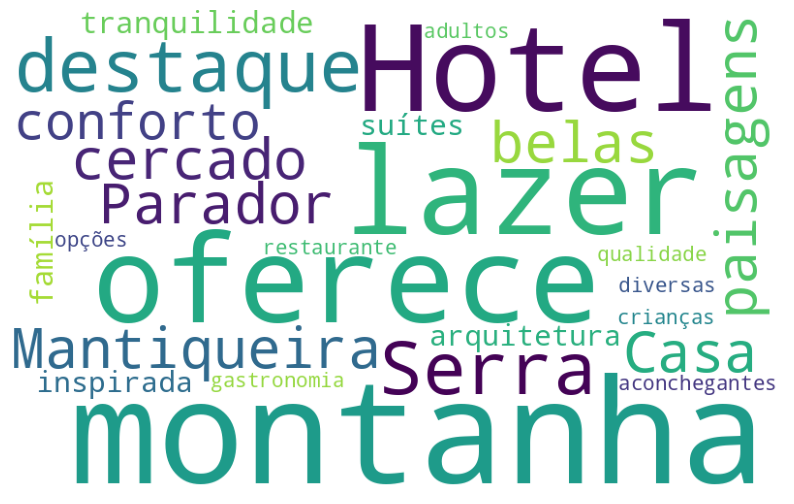

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# criar a nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=500,
                           background_color='white',
                           random_state=42).generate(" ".join(resultado))

# exibir a nuvem de palavras
plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras)
plt.axis("off")
plt.show()

A seguir é apresentado outro exemplo em que a biblioteca `NLTK` é usada para remover `stopwords` de um conjunto de tweets em português e criar um gráfico de barras com as palavras mais frequentes.

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# exemplo de conjunto de tweets
tweets = [
    "Acabei de assistir um filme incrível no cinema!",
    "Hoje é um dia muito especial para mim. Estou muito feliz!",
    "Preciso estudar para a prova de matemática que será amanhã.",
    "Comprei um livro novo que estou ansioso para ler.",
    "Estou cansado de ficar em casa o tempo todo. Preciso sair um pouco."
]

# carregar as stopwords em portugues
stopwords = set(stopwords.words('portuguese'))

# tokenizar e removee as stopwords dos tweets
palavras = []
for tweet in tweets:
    tokens = nltk.word_tokenize(tweet.lower())
    palavras.extend([token for token in tokens if not token in stopwords])

# contar a frequencia das palavras
frequencia = Counter(palavras)

# selecionar as 10 palavras mais frequentes
mais_frequentes = frequencia.most_common(10)

In [ ]:
print(mais_frequentes)

[('.', 5), ('!', 2), ('preciso', 2), ('acabei', 1), ('assistir', 1), ('filme', 1), ('incrível', 1), ('cinema', 1), ('hoje', 1), ('dia', 1)]


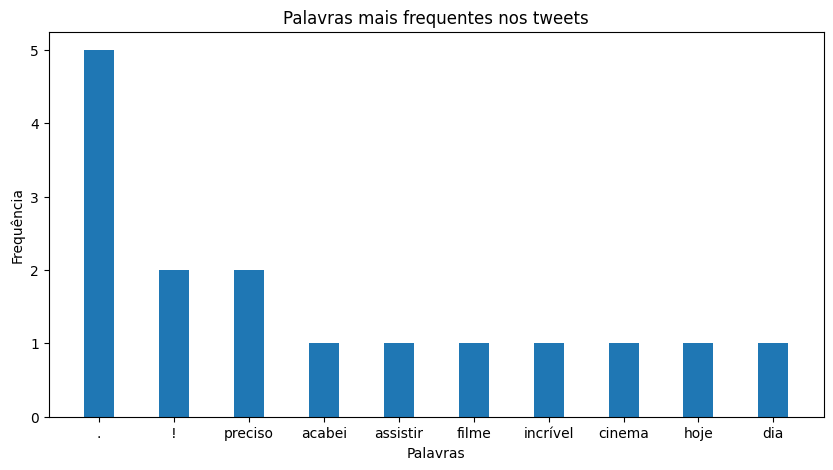

In [ ]:
import matplotlib.pyplot as plt

# criar um grafico de barras com as palavras mais frequentes
plt.figure(figsize=(10, 5))
plt.bar([palavra[0] for palavra in mais_frequentes], [palavra[1] for palavra in mais_frequentes],
        width=0.4)
plt.title("Palavras mais frequentes nos tweets")
plt.xlabel("Palavras")
plt.ylabel("Frequência")
plt.show()

Aqui está um exemplo de como remover *stopwords* em inglês usando a biblioteca `NLTK` em `Python`.

In [ ]:
from nltk.corpus import stopwords

text = "The quick brown fox jumps over the lazy dog"
words = text.lower().split()

stop_words = set(stopwords.words('english'))
words_without_stopwords = [word for word in words if word not in stop_words]

print(words_without_stopwords)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


Aqui está um exemplo de como remover as *stopwords* em português e em inglês usando o `NLTK`:

In [ ]:
import nltk
from nltk.corpus import stopwords

# definir as stopwords em portugues
stopwords_pt = set(stopwords.words('portuguese'))

# definir as stopwords em ingles
stopwords_en = set(stopwords.words('english'))

# exemplo de texto em dois idiomas
texto = """The hotel room was great, but the breakfast could have been better.
           O quarto do hotel era ótimo, mas o café da manhã poderia ter sido melhor."""

# remover as stopwords correspondentes aos dois idiomas
palavras = [palavra for palavra in texto.split() if palavra.lower() not in stopwords_pt and palavra.lower() not in stopwords_en]

In [ ]:
# imprimir as palavras sem as stopwords em portugues e ingles
print("Texto sem stopwords:", " ".join(palavras))

Texto sem stopwords: hotel room great, breakfast could better. quarto hotel ótimo, café manhã poderia ter sido melhor.


**Detecção de Idiomas**

É possível usar a biblioteca `langdetect` para identificar o idioma  e em seguida remover as *stopwords* correspondentes ao idioma. Aqui está um exemplo de como fazer isso:

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=24bf2ab65bf29a6c5aa012b60aff0346d69d3a2350be6dfb23678f189a88dda9
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
import nltk
from nltk.corpus import stopwords
from langdetect import detect

# definir as stopwords em portugues
stopwords_pt = set(stopwords.words('portuguese'))

# definir as stopwords em ingles
stopwords_en = set(stopwords.words('english'))

# exemplo de texto em dois idiomas
avaliacoes = ["The hotel room was great, but the breakfast could have been better.",
               "O quarto do hotel era ótimo, mas o café da manhã poderia ter sido melhor."]

In [ ]:
# identificar os idiomas
for avaliacao in avaliacoes:
  print(detect(avaliacao))

en
pt


In [ ]:
palavras = []

# remover as stopwords correspondentes ao idioma
for avaliacao in avaliacoes:

   idioma = detect(avaliacao)

   if idioma == 'pt':
        for palavra in avaliacao.split():
           if palavra.lower() not in stopwords_pt:
              palavras.append(palavra)
   elif idioma == 'en':
        for word in avaliacao.split():
           if word.lower() not in stopwords_en:
              palavras.append(word)
   else:
      print("Idioma não suportado.")

In [ ]:
# imprimir as palavras sem as stopwords
print(palavras)

['hotel', 'room', 'great,', 'breakfast', 'could', 'better.', 'quarto', 'hotel', 'ótimo,', 'café', 'manhã', 'poderia', 'ter', 'sido', 'melhor.']
